# Breast Cancer Classification using  an XGBoost classifier and a deep learning model (Keras Sequential)

### Importing the relevant packages

In [42]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import Dense, Dropout
from keras.models import Sequential, load_model
from keras.optimizers import RMSprop

# ETL

In [43]:
# The code was removed by Watson Studio for sharing.

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Feature Engineering

In [44]:
df = df.drop(['Unnamed: 32'], axis =1) #This column doesn't make any sense and needs to be removed.

In [45]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [46]:
df = pd.get_dummies(df, columns=["diagnosis"]) #Making the diagnosis column into dummy variables

In [47]:
df = df.drop(['diagnosis_B'], axis =1) #Because a negative diagnosis is already fully incorporated by a 0 under diagnosis M (negative)
df = df.rename(columns={'diagnosis_M': 'diagnosis'}) #1 means positive, 0 means negative

In [48]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


## Exploratory Data Analysis (checking data type, looking for outliers via the plot)

In [49]:

df.dtypes

id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01f599aeb8>,
      dtype=object)

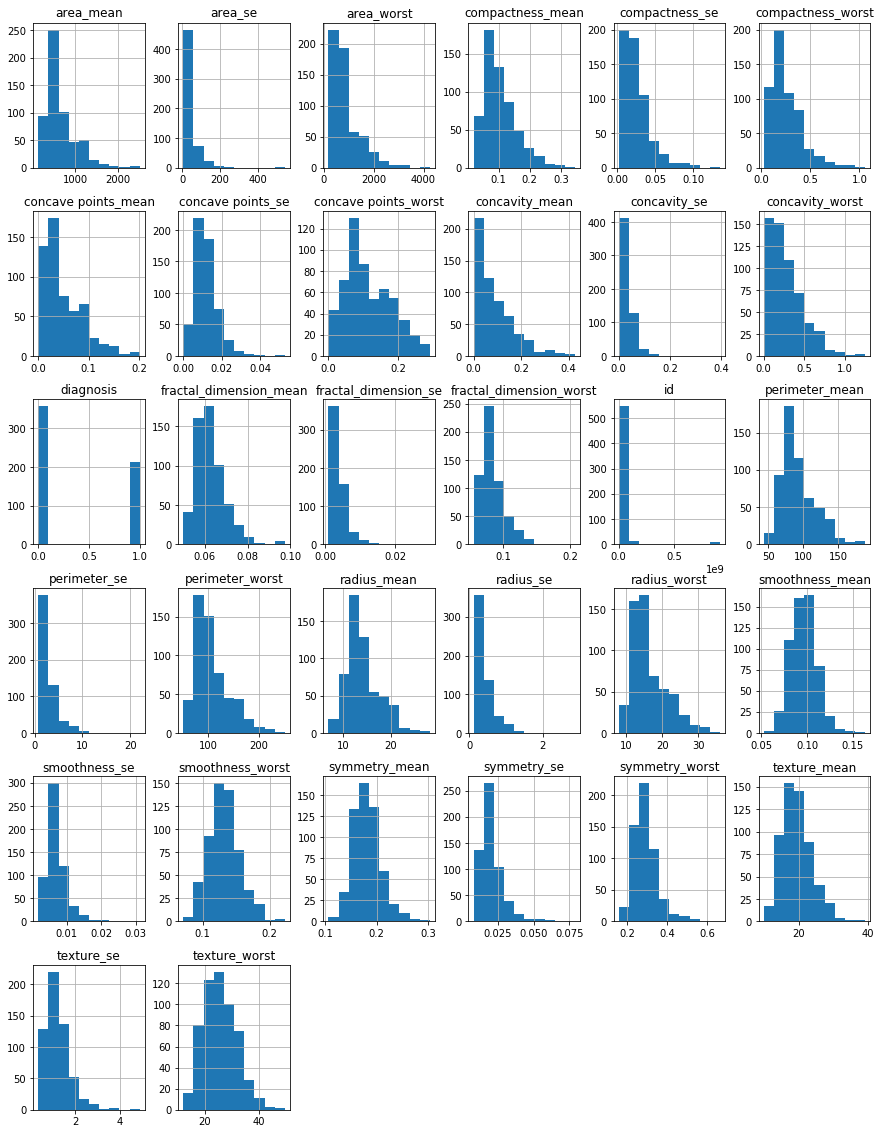

In [50]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

In [51]:
print(df.isnull().sum()) #Looking for missing data

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64


### There are no missing values, the data types are all correct, and there appear to be no outliers in the data. The next step is to build the model. The data is divided into X (Independent variables) and Y (Dependent) which in this case is 'diagnosis'.

In [52]:
Y = df['diagnosis'] #This is the variable we are trying to build predictions for
X =  df.iloc[:, 1:31] #These are the variables that we will use to predict from. (All Variables except 'id' and 'diagnosis')

In [53]:
X1= X.iloc[:, :10]
X1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


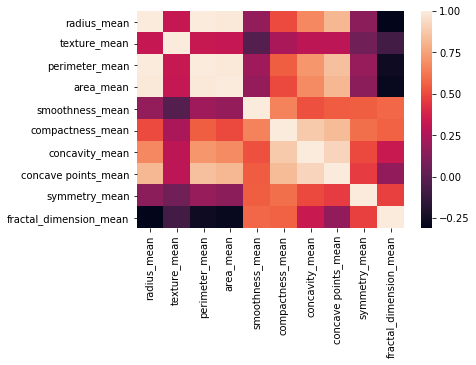

In [54]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = X1.corr()
sn.heatmap(corrMatrix, annot=False)
plt.show()

### Normally, the best thing to do next would be some data normalization. However, the XGBoost Model that is used makes data normalization unnecesary. KFold data cross validation is used to make sure we are using all of the data and that the model is producing reproducible results.

In [55]:
kf = KFold(n_splits=5, random_state=2, shuffle = True) #K Folds with five folds of the data

In [56]:
model = XGBClassifier() #The Default XGBoost classifier

In [57]:
scores = cross_val_score(model, X, Y, scoring= 'accuracy', cv=kf, n_jobs=-1) #Measuring how effective the XGB Model is at predicting cases.

# Final Result

In [58]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.958 (0.015)


### Now a deep learning model will be built and we will see if it can beat an accuracy score of 0.958


In [59]:
import keras
print('Current:\t', keras.__version__)
print('Expected:\t 2.2.5 ')

Current:	 2.2.4
Expected:	 2.2.5 


In [60]:
!pip install keras==2.2.5

In [61]:
!pip install tensorflow==1.15.0

     |████████████████████████████████| 788kB 9.6MB/s eta 0:00:01
  Found existing installation: setuptools 40.8.0
    Uninstalling setuptools-40.8.0:
      Successfully uninstalled setuptools-40.8.0


In [62]:
K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)))

## Unlike the XGBoost Model, the keras classifier greatly benefits from normalization. The scale funtion from the preprocessing will ensure that we are not overweighting certain variables.

In [63]:
X = preprocessing.scale(X)

In [64]:


# the data, split between train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


### Building the Keras Model

In [68]:
model = keras.Sequential([
    keras.layers.Dense(30, activation=tf.nn.relu, input_dim=30),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])


model.compile(loss='binary_crossentropy',     
        optimizer='adam',
        metrics=['accuracy'])

model.fit(X_train, Y_train,
        batch_size=1, #How Many Data Points we want the model looks at before the model updates towards global minimum. I chose a batch of 1 through trial and error.
        epochs=5, #Number of times the Model will be trained. This allows for the checking of the consistancy of the deep learning model.
        verbose=1, #This variable explains how much information we want the model to give while training.
        validation_data=(X_test, Y_test))
        


Train on 455 samples, validate on 114 samples
Epoch 1/5
455/455 [==============================] - 18s 40ms/step - loss: 0.1920 - acc: 0.9429 - val_loss: 0.0774 - val_acc: 0.9825
Epoch 2/5
455/455 [==============================] - 13s 28ms/step - loss: 0.0899 - acc: 0.9780 - val_loss: 0.0620 - val_acc: 0.9825
Epoch 3/5
455/455 [==============================] - 15s 34ms/step - loss: 0.0688 - acc: 0.9824 - val_loss: 0.0598 - val_acc: 0.9912
Epoch 4/5
455/455 [==============================] - 13s 29ms/step - loss: 0.0571 - acc: 0.9846 - val_loss: 0.0575 - val_acc: 0.9737
Epoch 5/5
455/455 [==============================] - 18s 39ms/step - loss: 0.0503 - acc: 0.9846 - val_loss: 0.0537 - val_acc: 0.9912


# Final Result

In [69]:
score = model.evaluate(X_test, Y_test, verbose=0)

print('\n')
print('Accuracy:',score[1])



Accuracy: 0.9912280701754386


## XGBoost Model- 95.8% Accuracy
## Keras Model - 99.12% Accuracy